# CHURN ANALYSIS

A step-by-step approach to predict customer attrition using supervised machine learning algorithms in Python

Attrition - the process of reducing something's strength or effectiveness through sustained attack or pressure

Customer attrition is the loss of customers by a business

- By the end of this article, let’s attempt to solve some of the key business challenges pertaining to customer attrition like say, 
1. what is the likelihood of an active customer leaving an organization?
2. what are key indicators of a customer churn?
3. what retention strategies can be implemented based on the results to diminish prospective customer churn?

In real-world, we need to go through seven major stages to successfully predict customer churn:
    Section A: Data Preprocessing
        Section B: Data Evaluation
            Section C: Model Selection
            Section D: Model Evaluation
            Section E: Model Improvement
            Section F: Future Predictions
            Section G: Model Deployment

# Section A: Data Preprocessing Section

Understanding the end-to-end structure of your dataset and reshaping the variables is the gateway to a qualitative predictive modelling initiative.

IMPORTING LIBRARIES

In [1]:
pwd

'C:\\Users\\DELL'

In [1]:
# Standard libraries for data analysis:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [2]:
# sklearn modules for data preprocessing:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# sklearn modules for Model selection:

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# sklearn modules for Model Evaluation & Improvement:

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [5]:
# Standard libraries for data visualization:

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


In [6]:
# Miscellaneous Utility Libraries:

import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

SET UP THE CURRENT WORKING DIRECTORY:

In [7]:
os.chdir(r"C:/Users/DELL/")

IMPORT THE DATASET

In [8]:
dataset = pd.read_csv('Desktop/Placement/Customer_Churn/customer_churn_data.csv')

EVALUATE DATA STRUCTURE

In [9]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- We have got a telco customer churn dataset where each record entails the nature of subscription, tenure, frequency of payment and churn (signifying their current status).


In [10]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
# need to take care of missing values
dataset.columns.to_series().groupby(dataset.dtypes).groups
# to_series()   ----->>>>>>>>     #Create a Series with both index and values equal to the index keys.

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object')}

There seem to be no missing values in the dataset

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [15]:
dataset.isna().any()

# isna() ------->>>>>>> Detect missing values for an array-like object
# any() -------->>>>>>>> Return whether any element is Truthy

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

- Unique values in each categoorical variable: When we look into the unique values in each categorical variables, we get an insight that the customers are either on a month-to-month rolling contract or on a fixed contract for one/two years. Also, they are paying bills via credit card, bank transfer or electronic checks.

In [16]:
dataset["PaymentMethod"].nunique()


4

In [17]:
dataset["PaymentMethod"].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [18]:
dataset["Contract"].nunique()


3

In [19]:
dataset["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

CHECK TARGET VARIABLE DISTRIBUTION(OF CHURN VALUES)

In [20]:
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

CLEAN THE DATASET:

In [21]:
# errors : {'ignore', 'raise', 'coerce'}, default 'raise' -> If 'raise', then invalid parsing will raise an exception. -> 
#    If 'coerce', then invalid parsing will be set as NaN. -> 
###    If 'ignore', then invalid parsing will return the input.

dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

TAKING CARE OF MISSING DATA WIHT THE FACT IN MIND THAT IN OUR DATA THERE IS NOT MISSING VALUES
- LETS DO THE EXERCISE FOR FUTURE REFERENCE

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [23]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [24]:
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
    if col in na_cols:
        if dataset[col].dtype != 'object':
            dataset[col] = dataset[col].fillna(dataset[col].mean()).round(0)

In [25]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

LABEL ENCODE BINARY DATA:

In [26]:
# Machine Learning algorithms can typically only have numerical values as their independent variables.
# Hence label encoding is quite pivotal as they encode categorical labels with appropriate numerical values.
# Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

# create a label encoder object

le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
            
print('{} columns were label encoded.'.format(le_count) )

6 columns were label encoded.


In [27]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1


# Section B: Data Evaluation

EXPLORATORY DATA ANALYSIS:
- Let’s try to explore and visualize our data set by doing distribution of independent variables to better understand the patterns in the data and to potentially form some hypothesis.

Plot historic of numeric columns:

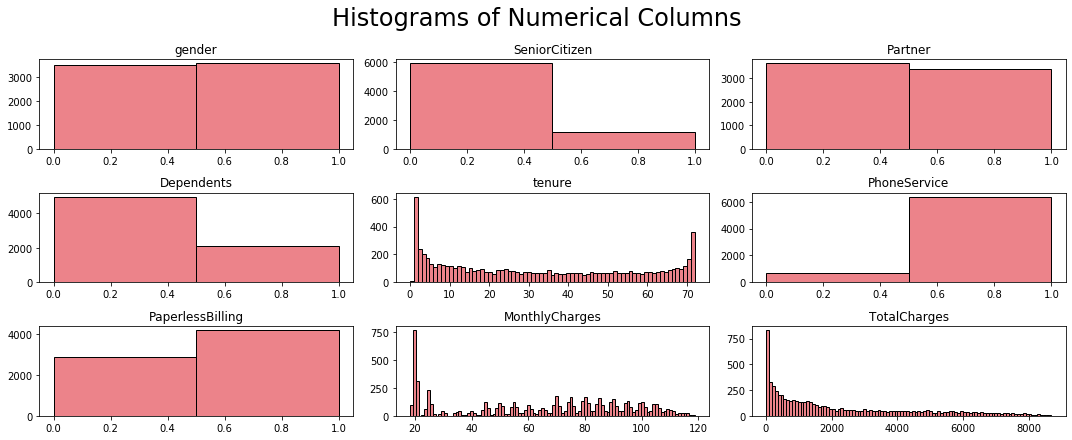

In [28]:
#Python iloc() function enables us to select a particular cell of the dataset, that is,
#it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

dataset2 = dataset[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]
#Histogram:

fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal",fontsize=24, fontfamily="sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i+1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals>=100:
        vals  = 100

    plt.hist(dataset2.iloc[:,i], bins = vals, color = '#ec838a',edgecolor='black')#, log = True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


Analyze the distribution of categorial variables:

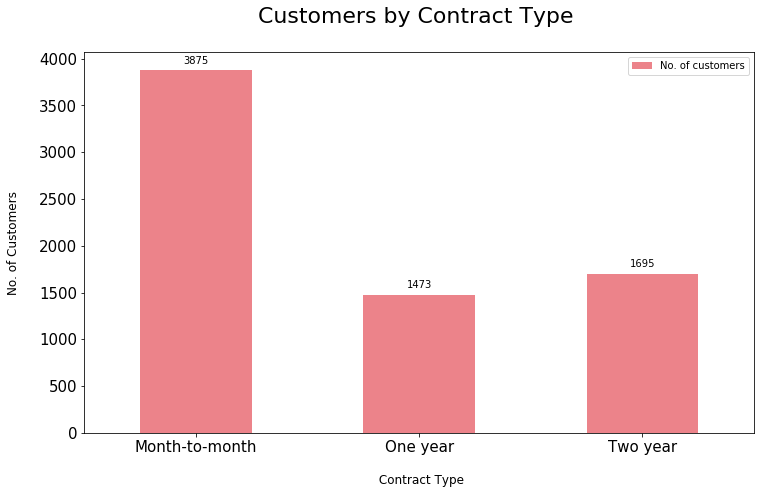

In [29]:
# Distribution of contract type:

contract_split = dataset[["customerID", "Contract"]]
sectors = contract_split.groupby("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace = True)

ax = contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type', legend = True, table = False, grid = False, subplots = False, figsize = (12, 7), color = '#ec838a',fontsize = 15, stacked = False)

plt.ylabel('No. of Customers\n', horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.xlabel('\n Contract Type', horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.title('Customers by Contract Type \n', horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right',fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation = 0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        
        ax.annotate(label,(x_value, y_value), xytext = (0, space), textcoords="offset points", ha='center', va=va)
            
add_value_labels(ax)

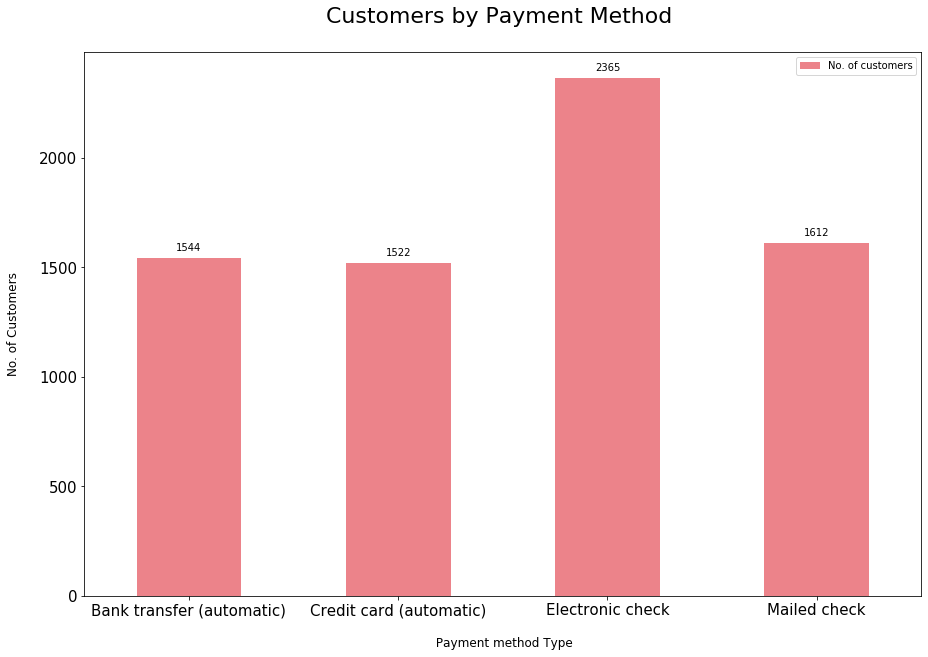

In [30]:
# Distribution of payment method type:

payment_method_split = dataset[["customerID", "PaymentMethod"]]
Sectors = payment_method_split.groupby("PaymentMethod")
payment_method_split = pd.DataFrame(Sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace = True)

ax = payment_method_split[["No. of customers"]].plot.bar(title='Customers by Payment Method', legend = True, table = False, grid = False, subplots = False, figsize = (15,10),color = '#ec838a', fontsize = 15, stacked = False)

plt.ylabel('No. of Customers\n', horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Payment method Type', horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.title('Customers by Payment Method \n', horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right',fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation = 0, horizontalalignment="right")

x_labels = np.array(payment_method_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        
        ax.annotate(label,(x_value, y_value), xytext = (0, space), textcoords="offset points", ha='center', va=va)
            
add_value_labels(ax)

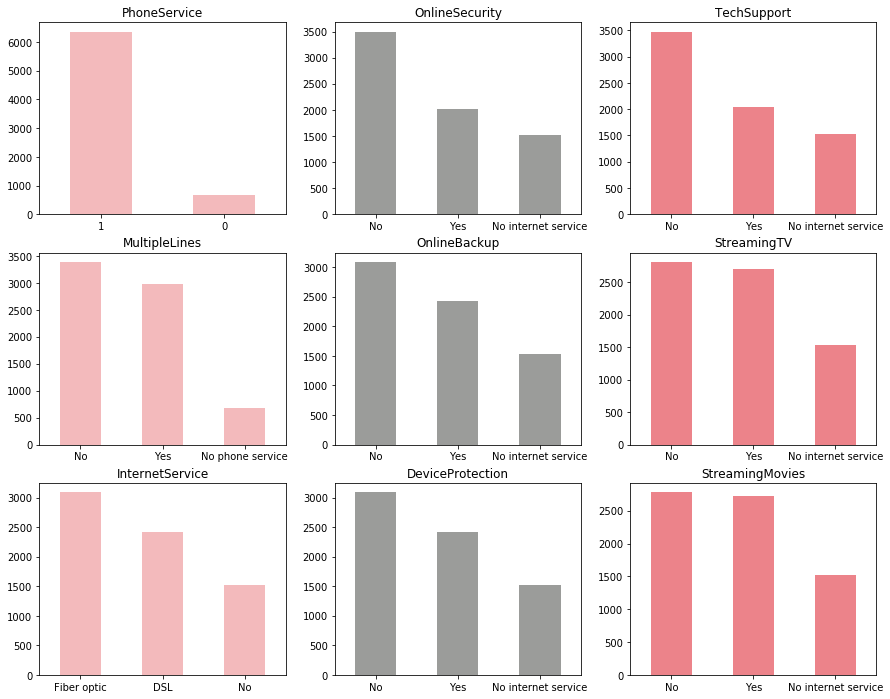

In [31]:
# Distribution of label encoded categorical variables:

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (15,12))

for i, item in enumerate(services):
    if i<3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax = axes[i,0],rot = 0, color = '#f3babc')
        
    elif i>=3 and i<6:
        ax = dataset[item].value_counts().plot(kind = 'bar', ax = axes[i-3,1], rot=0,color='#9b9c9a')
        
    elif i<9:
        ax = dataset[item].value_counts().plot(kind = 'bar', ax = axes[i-6,2], rot=0,color='#ec838a')
    ax.set_title(item)


Analyze the churn rate by categorical variables:

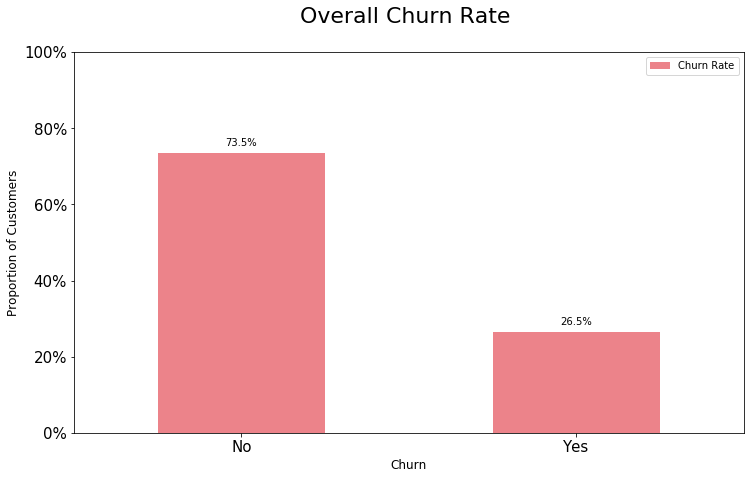

In [32]:
# Overall churn rate:
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn","customerID"]].copy()
churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0),"No", "Yes"))

sectors = churn_rate.groupby("churn_label")
churn_rate=pd.DataFrame(sectors["customerID"].count())

churn_rate["Churn Rate"]=(churn_rate["customerID"]/sum(churn_rate["customerID"]))*100

ax = churn_rate[["Churn Rate"]].plot.bar(title='Overall Churn Rate',legend=True,table=False,grid=False,subplots=False,figsize=(12, 7),color='#ec838a',fontsize="15",stacked=False,ylim=(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",fontstyle="normal", fontsize="large",fontfamily="sans-serif")

plt.xlabel('Churn',horizontalalignment="center",fontstyle="normal", fontsize="large",fontfamily="sans-serif")

plt.title('Overall Churn Rate \n',horizontalalignment="center",fontstyle="normal", fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x()+rect.get_width()/2
        space =spacing
        va = 'bottom'
        if y_value<0:
            space *= -1
            va = 'top'
        label = "{:.1f}%".format(y_value)
        ax.annotate(label,(x_value,y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
    
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

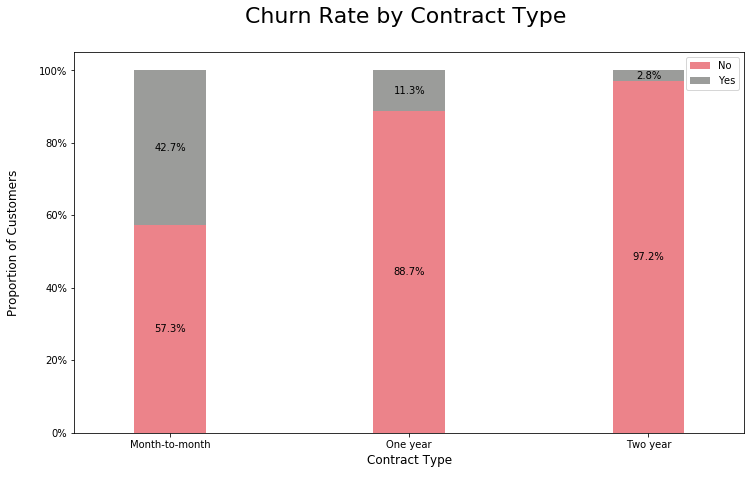

In [33]:
# Churn rate by Contract Type:
#  Customers with a prepaid or 
#  rather a month-to-month connection have a very high probability to churn compared to their peers on 1 or 2 years contracts.
import matplotlib.ticker as mtick
contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors = ['#ec838a','#9b9c9a']

ax = (contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind='bar',width=0.3,stacked=True,rot=0,figsize=(12,7),color=colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle="normal",fontsize="large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n', horizontalalignment="center",fontstyle="normal", fontsize="large", fontfamily="sans-serif")

plt.title('Churn Rate by Contract Type \n',horizontalalignment="center",fontstyle="normal", fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.1f}%'.format(height),horizontalalignment='center',verticalalignment='center')
    
ax.autoscale(enable=False, axis='both', tight =False)

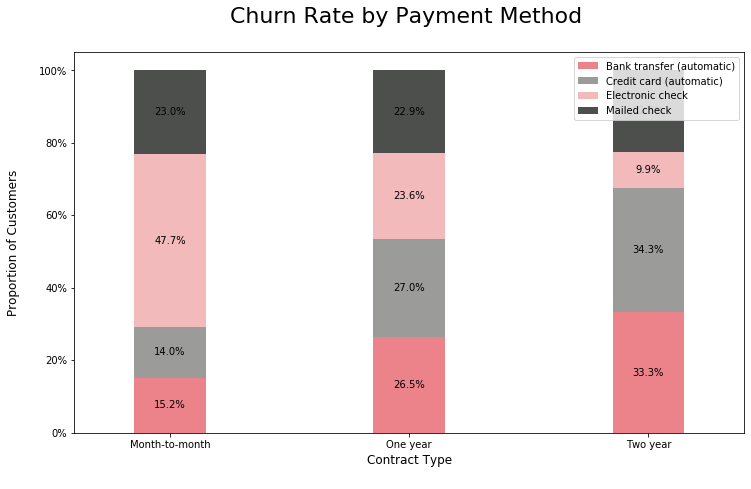

In [34]:
# Churn rate by payment method

import matplotlib.ticker as mtick

contract_churn = dataset.groupby(['Contract','PaymentMethod']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors=['#ec838a','#9b9c9a','#f3babc','#4d4f4c']

ax = (contract_churn.T*100.0/contract_churn.T.sum()).T.plot(kind='bar',width=0.3,stacked=True,rot=0,figsize=(12,7),color=colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle="normal",fontsize="large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n', horizontalalignment="center",fontstyle="normal", fontsize="large", fontfamily="sans-serif")

plt.title('Churn Rate by Payment Method \n',horizontalalignment="center",fontstyle="normal", fontsize="22",fontfamily="sans-serif")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.1f}%'.format(height),horizontalalignment='center',verticalalignment='center')
    
ax.autoscale(enable=False, axis='both', tight =False)

Find positive and negative correlations:

In [35]:
# Interestingly, the churn rate increases with monthly charges and age
# In contrast Partner, Dependents and Tenure seem to be negatively related to churn.

dataset2 = dataset[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]

correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 gender         -0.008612
Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199426
tenure         -0.352229
dtype: float64


Plot positive and negative correlations:

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

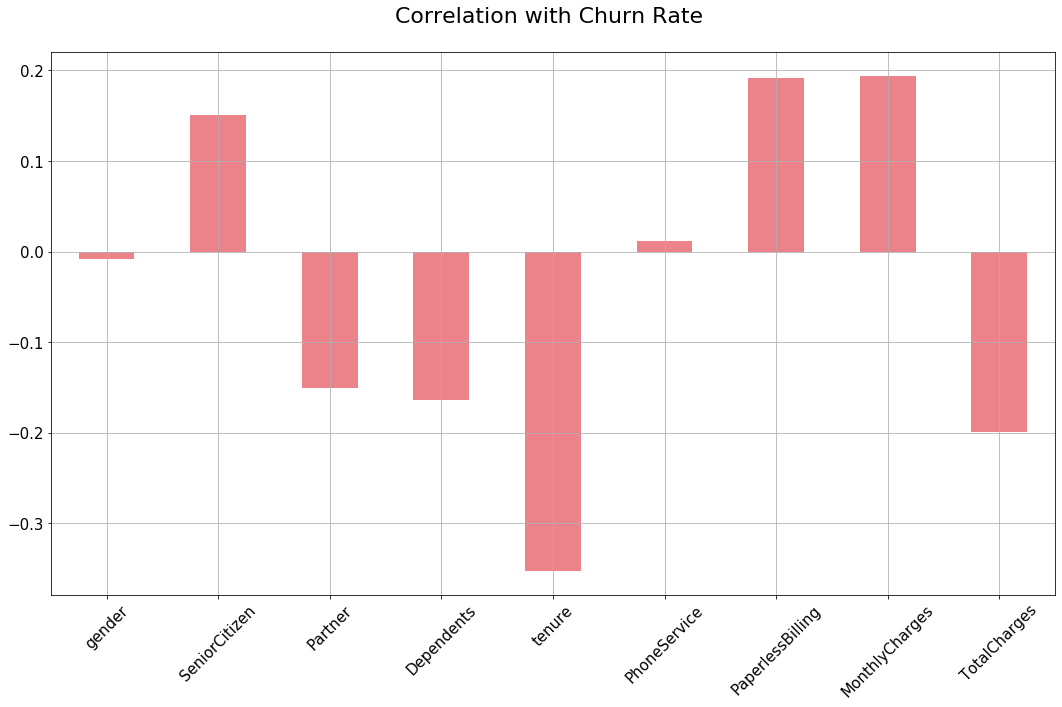

In [36]:


correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(figsize = (18, 10),fontsize = 15, color = '#ec838a', rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal",fontsize = '22', fontfamily = "sans-serif")

PLot correlation Matrix of all independent variables:

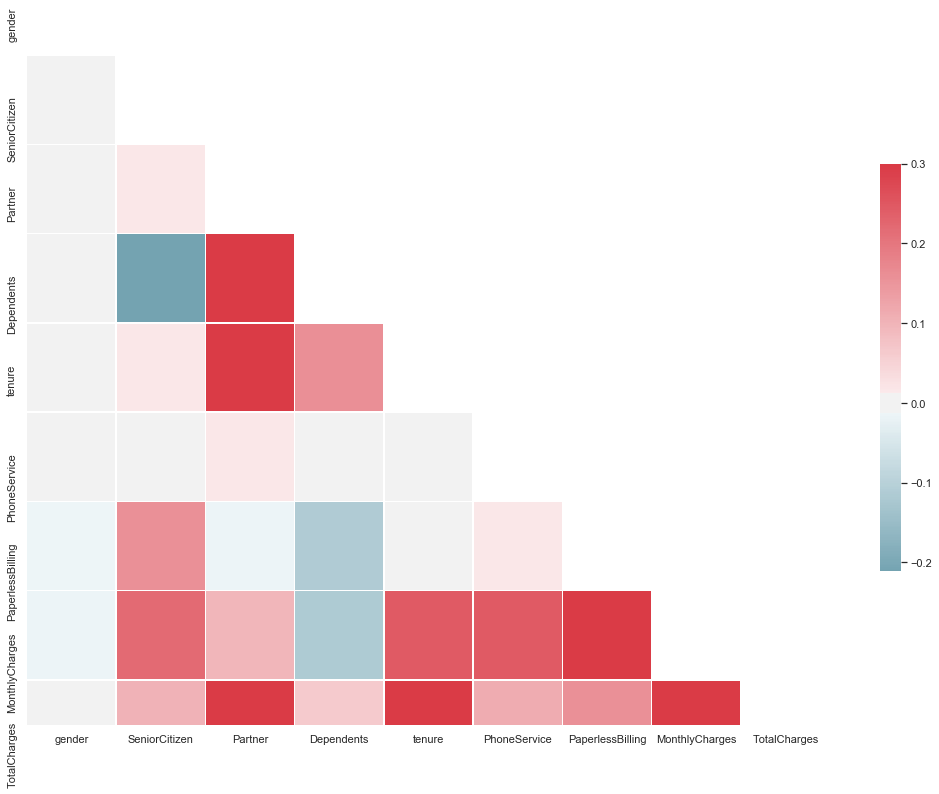

In [37]:
# Correlation matrix helps us to discover the bivariate relationship between independent variables in a dataset.
# Bivariate ---->>>>> involving or depending on two variates.

# Set and compute the correlation Matrix:

sn.set(style="white")
corr=dataset2.corr()

# Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=np.bool) ## The numpy zeros_like() method takes an array, dtype, order,
                                           ##  and subok as arguments and returns the array with element values as zeros.
mask[np.triu_indices_from(mask)] = True   #Return the indices for the upper-triangle of arr.
# Set up the matplotlib figure and a diverging colormap:

f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap = True)

#Draw the heatmap with the mask and correct aspect ratio:

sn.heatmap(corr, mask=mask, cmap=cmap, vmax = .3, center=0, square = True, linewidths = .5, cbar_kws={"shrink": .5})

Check Multicollinearity using VIF
- Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.
- Eating chips and watching television are highly correlated in the case of Colin and we cannot individually determine the impact of the individual activities on his happiness. This is the multicollinearity problem.
- VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [38]:
def calc_vif(X):
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

dataset2 = dataset[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]

calc_vif(dataset2)

,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269


Text(0.5, 1.0, 'Collinearity of Montly Charges and Total Charges \n')

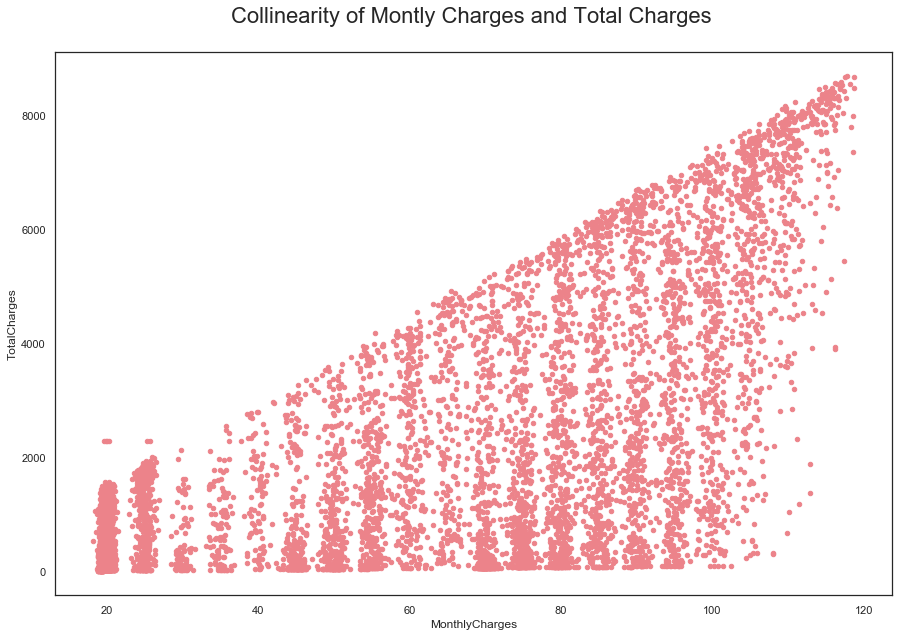

In [39]:
# We can see here that the ‘Monthly Charges’ and ‘Total Charges’ have a high VIF value.

# 'Total Charges' seem to be collinear with 'Monthly Charges'.

#Check Collinearity:

dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize=(15,10),x='MonthlyCharges',y='TotalCharges',color='#ec838a')

plt.title('Collinearity of Montly Charges and Total Charges \n',horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily = "sans-serif")

In [40]:
# Let’s try to drop one of the correlated features to see if 
#  it help us in bringing down the multicollinearity between correlated features:

# Dropping TotalCharges

dataset2 = dataset2.drop(columns = "TotalCharges")

# Revalidate Collinearity:

dataset2 = dataset[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges']]

calc_vif(dataset2)




,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


In [41]:
#Applying changes in the main dataset:

dataset = dataset.drop(columns = "TotalCharges")

In [42]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1


Let’s try to summarise some of the key findings from this EDA: 
    - The dataset does not have any missing or erroneous data values.
    - Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with Partner, Dependents and Tenure.
    - The dataset is imbalanced with the majority of customers being active.
    - There is multicollinearity between Monthly Charges and Total Charges. Dropping Total Charges have decreased the VIF values considerably.
    - Most of the customers in the dataset are younger people.
    - There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s above 70 months old.
    - Most of the customers seem to have phone service with Monthly charges spanning between $18 to $118 per customer.
    - Customers with a month-to-month connection have a very high probability to churn that too if they have subscribed to pay via electronic checks.

Encode Categorical data:

In [43]:
# get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

# Any categorical variable that has more than two unique values have been dealt with Label Encoding and 
#  one-hot Encoding using get_dummies method in pandas here

#One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one,
#  which has 1 as its value, where 1 represents a boolean specifying a category of the element

#Incase if user_id is an object:

identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")

#Convert rest of categorical variable into dummy:

dataset = pd.get_dummies(dataset)

#Rejoin user_id to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

Split the dataset into dependent and independent variables:
    

In [44]:
# Now we need to separate the dataset into X and y values. y would be the ‘Churn’ column 
#  whilst X would be the remaining list of independent variables in the dataset.

#Identify response variable:

response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

Generate training and test datasets

In [45]:
#  Let’s decouple the master dataset into training and test set with an 80%-20% ratio.
#  To avoid it, it is common practice when performing a (supervised) machine learning experiment 
#   to hold out part of the available data as a test set X_test, y_test.
#  In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function.

X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2) #use 0.9 if data is huge.random_state = 0)

# to resolve any class imbalance - use stratify parameter
                                                    
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 40)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 40)
Number transactions y_test dataset:  (1409,)


Remove identifiers:

In [46]:
#Separate ‘customerID’ from training and test data frames.

train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [47]:
X_train['gender'].value_counts()

1    2839
0    2795
Name: gender, dtype: int64

In [48]:
X_test['gender'].value_counts()

1    716
0    693
Name: gender, dtype: int64

In [49]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6088,0,0,0,0,1,1,1,55.40,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
320,0,1,0,0,54,1,0,82.45,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
3489,0,0,1,0,26,1,1,90.10,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
6971,0,1,1,0,18,1,0,99.75,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0
1669,0,0,0,0,8,1,1,74.60,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


In [50]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6403,1,0,1,1,72,1,1,116.60,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
5099,0,0,0,1,11,1,0,20.10,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
6931,1,0,0,0,58,1,0,99.15,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
5891,1,0,0,0,11,0,1,41.60,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
6152,0,0,0,0,16,1,1,93.20,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0


Conduct feature scaling

In [51]:
#  It’s quite important to normalize the variables before conducting any machine learning (classification) algorithms
#   so that all the training and test variables are scaled within a range of 0 to 1.
#  StandardScaler -->> Standardize features by removing the mean and scaling to unit variance

sc_x = StandardScaler()
X_train2 = pd.DataFrame(sc_x.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_x.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [52]:
X_train2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6088,-1.00784,-0.436885,-0.967170,-0.658197,-1.280489,0.324252,0.829359,-0.322310,1.049502,-0.324252,-0.866788,1.381529,-0.892500,-0.519951,1.002488,-0.519951,-0.636662,1.135889,-0.519951,-0.734687,1.125701,-0.519951,-0.727541,1.007483,-0.519951,-0.640518,1.217798,-0.519951,-0.790296,-0.815108,-0.519951,1.255910,0.905086,-0.513886,-0.564095,-0.531228,-0.527931,1.401322,-0.538089
320,-1.00784,2.288930,-0.967170,-0.658197,0.876196,0.324252,-1.205750,0.579165,-0.952833,-0.324252,1.153685,1.381529,-0.892500,-0.519951,-0.997518,-0.519951,1.570693,-0.880368,-0.519951,1.361124,1.125701,-0.519951,-0.727541,-0.992573,-0.519951,1.561237,-0.821154,-0.519951,1.265349,-0.815108,-0.519951,1.255910,-1.104868,1.945956,-0.564095,1.882432,-0.527931,-0.713612,-0.538089
3489,-1.00784,-0.436885,1.033945,-0.658197,-0.263185,0.324252,0.829359,0.834111,-0.952833,-0.324252,1.153685,1.381529,-0.892500,-0.519951,-0.997518,-0.519951,1.570693,-0.880368,-0.519951,1.361124,-0.888335,-0.519951,1.374493,-0.992573,-0.519951,1.561237,-0.821154,-0.519951,1.265349,-0.815108,-0.519951,1.255910,-1.104868,1.945956,-0.564095,-0.531228,1.894188,-0.713612,-0.538089
6971,-1.00784,2.288930,1.033945,-0.658197,-0.588722,0.324252,-1.205750,1.155709,-0.952833,-0.324252,1.153685,-0.723836,1.120448,-0.519951,1.002488,-0.519951,-0.636662,1.135889,-0.519951,-0.734687,1.125701,-0.519951,-0.727541,-0.992573,-0.519951,1.561237,-0.821154,-0.519951,1.265349,-0.815108,-0.519951,1.255910,0.905086,-0.513886,-0.564095,1.882432,-0.527931,-0.713612,-0.538089
1669,-1.00784,-0.436885,-0.967170,-0.658197,-0.995644,0.324252,0.829359,0.317554,-0.952833,-0.324252,1.153685,-0.723836,1.120448,-0.519951,1.002488,-0.519951,-0.636662,1.135889,-0.519951,-0.734687,1.125701,-0.519951,-0.727541,1.007483,-0.519951,-0.640518,1.217798,-0.519951,-0.790296,1.226831,-0.519951,-0.796235,0.905086,-0.513886,-0.564095,-0.531228,1.894188,-0.713612,-0.538089


In [53]:
X_test2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6403,0.983807,-0.451966,1.036875,1.569050,1.634208,0.339997,0.831551,1.747076,-1.006408,-0.339997,1.242305,-0.723356,1.164555,-0.549744,-0.976847,-0.549744,1.605036,-0.896715,-0.549744,1.450353,-0.873759,-0.549744,1.408960,-0.961698,-0.549744,1.574488,-0.789476,-0.549744,1.266663,-0.783565,-0.549744,1.257214,-1.110389,-0.515701,1.790522,1.906533,-0.513495,-0.700718,-0.571614
5099,-1.016459,-0.451966,-0.964436,1.569050,-0.857031,0.339997,-1.202572,-1.429333,0.993633,-0.339997,-0.804955,-0.723356,-0.858697,1.819030,-0.976847,1.819030,-0.623039,-0.896715,1.819030,-0.689487,-0.873759,1.819030,-0.709743,-0.961698,1.819030,-0.635127,-0.789476,1.819030,-0.789476,-0.783565,1.819030,-0.795410,0.900585,-0.515701,-0.558496,-0.524512,1.947439,-0.700718,-0.571614
6931,0.983807,-0.451966,-0.964436,-0.637329,1.062448,0.339997,-1.202572,1.172689,0.993633,-0.339997,-0.804955,-0.723356,1.164555,-0.549744,-0.976847,-0.549744,1.605036,-0.896715,-0.549744,1.450353,1.144481,-0.549744,-0.709743,1.039827,-0.549744,-0.635127,-0.789476,-0.549744,1.266663,-0.783565,-0.549744,1.257214,-1.110389,1.939107,-0.558496,1.906533,-0.513495,-0.700718,-0.571614
5891,0.983807,-0.451966,-0.964436,-0.637329,-0.857031,-2.941205,0.831551,-0.721636,-1.006408,2.941205,-0.804955,1.382446,-0.858697,-0.549744,1.023702,-0.549744,-0.623039,1.115182,-0.549744,-0.689487,-0.873759,-0.549744,1.408960,1.039827,-0.549744,-0.635127,-0.789476,-0.549744,1.266663,1.276218,-0.549744,-0.795410,-1.110389,1.939107,-0.558496,-0.524512,-0.513495,1.427108,-0.571614
6152,-1.016459,-0.451966,-0.964436,-0.637329,-0.652831,0.339997,0.831551,0.976838,0.993633,-0.339997,-0.804955,-0.723356,1.164555,-0.549744,1.023702,-0.549744,-0.623039,-0.896715,-0.549744,1.450353,-0.873759,-0.549744,1.408960,1.039827,-0.549744,-0.635127,1.266663,-0.549744,-0.789476,-0.783565,-0.549744,1.257214,0.900585,-0.515701,-0.558496,-0.524512,1.947439,-0.700718,-0.571614


# Section C: Model Selection

Compare baseline classification algorithms(1st iteration)

In [54]:
#  model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores.
# Classification Accuracy is the number of correct predictions made as a ratio of total predictions.
# when we have class imbalance issue, we sort the results based on the ‘Mean AUC’ value which is nothing but 
#   the model’s ability to discriminate between positive and negative classes.

models = []

models.append(('Logistic Regression',LogisticRegression(solver='liblinear',random_state = None, class_weight='balanced')))
# Logistic regression, despite its name, is a linear model for classification rather than regression.
# Solver : Algorithm to use in optimization problem. For small datasets, ‘liblinear’ is good, ‘sag’ and ‘saga’ for large ones.
# random_state : Used when solver == ‘sag’, ‘saga’ or ‘liblinear’ to shuffle the data.
# class_weight = Weights associated with classes in form {class_label: weight}. If not given, all classes are supposed to have weight one.

models.append(('SVC', SVC(kernel = 'linear', random_state=None)))
#SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

models.append(('Kernel SVM',SVC(kernel = 'rbf', random_state = None)))

models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)))
#  KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, 
#   where  is an integer value specified by the user. Neighbors-based classification is a type of instance-based learning or 
#   non-generalizing learning. it does not attempt to construct a general internal model, 
#   but simply stores instances of the training data.
#  n_neighbors : Number of neighbors to use by default for kneighbors queries.
#  metric = the distance metric to use for the tree.
#  P = Power parameter for the Minkowski metric. this is equivalent to euclidean_distance (l2) for p = 2

models.append(('Gaussian NB', GaussianNB()))
# Can perform online updates to model parameters via partial_fit.

models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = None)))
# Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.
#  The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
# criterion: The function to measure the quality of a split.“entropy” for the information gain.

models.append(('Random Forest', RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = None)))
# In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.
#  A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
# n_estimators: The number of trees in the forest.

#Evaluating Model Results:

acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm','ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']

model_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation:

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
# KFold divides all the samples in k groups of samples, called folds (if k=n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible).
#  Provides train/test indices to split data in train/test sets.
# n_splits: Number of folds. Must be at least 2.

# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                           ]
    i+=1
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.32,1.86,74.62,1.71
1,SVC,83.75,1.69,80.28,1.32
6,Random Forest,82.24,1.78,78.79,1.76
4,Gaussian NB,81.90,2.86,69.10,1.80
2,Kernel SVM,79.98,1.93,79.77,1.72
3,KNN,77.05,1.91,75.74,2.28
5,Decision Tree Classifier,65.03,1.66,72.58,1.92


Visualize Classification Algorithms Accuracy Comparisons:
    

- Using Accuracy Mean

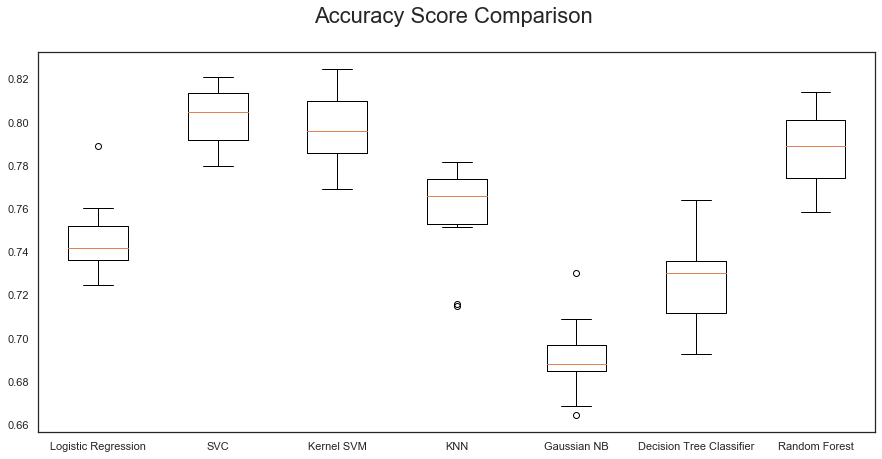

In [55]:
fig = plt.figure(figsize = (15, 7))
ax=fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.title('Accuracy Score Comparison \n', horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily="sans-serif")
plt.show()

- Using Area under ROC Curve: 

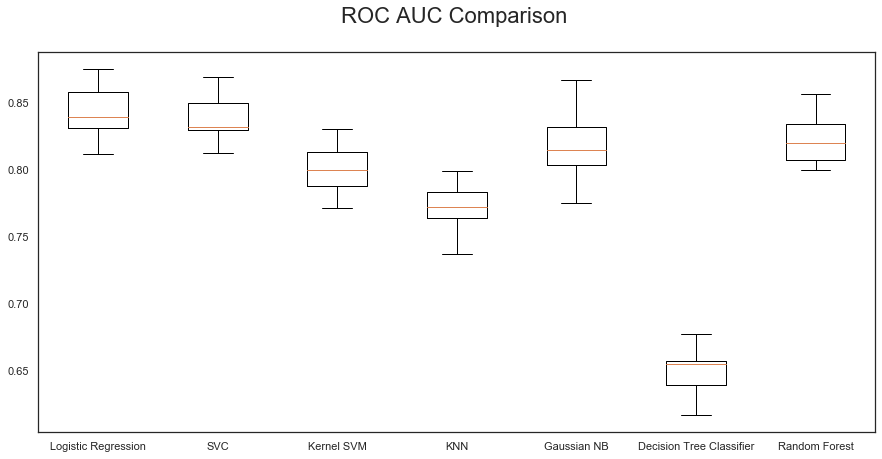

In [56]:
fig =plt.figure(figsize=(15, 7))
ax=fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.title('ROC AUC Comparison \n', horizontalalignment="center", fontstyle="normal", fontsize="22", fontfamily="sans-serif")
plt.show()

Get the right parameters for the baseline models: let’s optimize the parameters and finalize the evaluation metrics for model selection.

- Identify the optimal number of K neighbors for KNN Model:

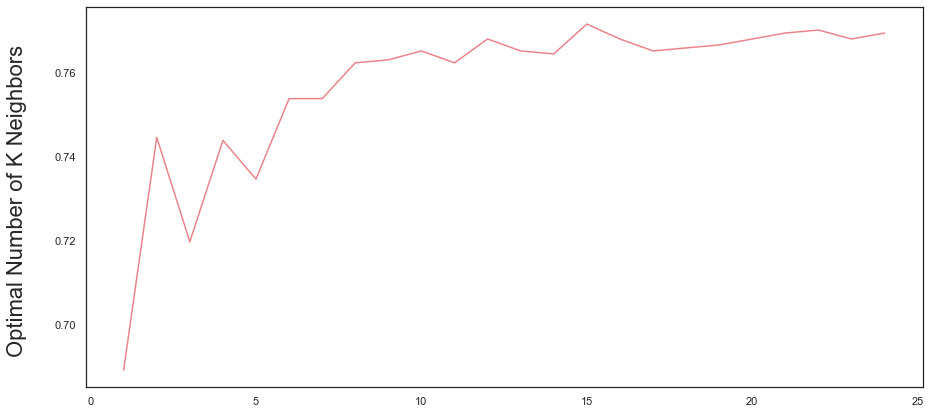

In [57]:
score_array =[]
for each in range(1,25):
    knn_loop=KNeighborsClassifier(n_neighbors = each)
    # set K neighbor as 3
    knn_loop.fit(X_train, y_train)
    score_array.append(knn_loop.score(X_test, y_test))
    
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color='#ec838a')

plt.ylabel('Range\n', horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.ylabel('Score\n', horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.ylabel('Optimal Number of K Neighbors \n', horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

#plt.legend(loc='upper right', fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [58]:
# we can see from the above iterations, if we use K = 22, then we will get the maximum score of 78%.

- Identify the optimal number of trees for Random Forest Model: 

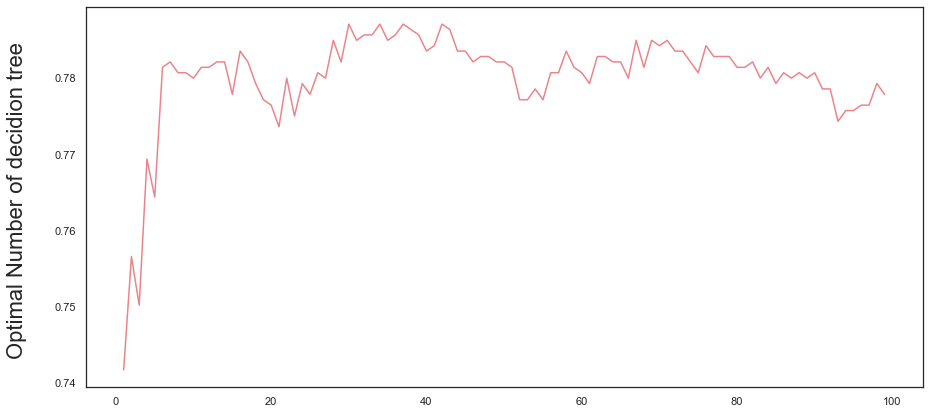

In [59]:
# we are trying to find the optimal number of decision trees to compose the best random forest.

score_array = []
for each in range(1, 100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(X_train, y_train)
    score_array.append(rf_loop.score(X_test, y_test))
fig = plt.figure(figsize=(15,7))
plt.plot(range(1, 100),score_array, color = '#ec838a')

plt.ylabel('Range\n', horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.ylabel('Score\n', horizontalalignment="center",fontstyle="normal",fontsize="large",fontfamily="sans-serif")

plt.ylabel('Optimal Number of decidion tree \n', horizontalalignment="center",fontstyle="normal",fontsize="22",fontfamily="sans-serif")

#plt.legend(loc='upper right', fontsize="medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Compare Baseline Classification Algorithms(2nd Iteration):
    - Here we will use the optimized parameters for KNN and Random Forest Models.
    - we know that false negatives are more costly than false positives in a churn.
    - hence let’s use precision, recall and F2 scores as the ideal metric for the model selection

- Logistic Regression:

In [60]:
# #--Step 15.4.1. Logistic Regression-----------------

# # Fitting Logistic Regression to the Training set 
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = classifier.predict(X_test)

# #Evaluate results

# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])



# #Step 15.4.2. . Support Vector Machine (linear classifier)------------------------


# # Fitting SVM (SVC class) to the Training set:

# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results 
# y_pred = classifier.predict(X_test)

# #Evaluate results

# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# results = results.append(model_results, ignore_index = True)


# #Step 15.4.3. K-Nearest Neighbours------------------------


# # Fitting KNN to the Training set:

# classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results 
# y_pred  = classifier.predict(X_test)

# #Evaluate results
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# results = results.append(model_results, ignore_index = True)



# #Step 15.4.4.  Kernel SVM------------------------

# # Fitting Kernel SVM to the Training set:

# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results 
# y_pred = classifier.predict(X_test)

# #Evaluate results

# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# results = results.append(model_results, ignore_index = True)


# #Step 15.4.5.  Naive Byes------------------------------------------------

# # Fitting Naive Byes to the Training set:
    
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

# # Predicting the Test set results 
# y_pred = classifier.predict(X_test)

# #Evaluate results
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
#                 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# results = results.append(model_results, ignore_index = True)



# #Step 15.4.6. Decision Tree---------------------------------------------


# # Fitting Decision Tree to the Training set:

# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)


# # Predicting the Test set results 
# y_pred = classifier.predict(X_test)

# #Evaluate results
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# results = results.append(model_results, ignore_index = True)


# #Step 15.4.7. Random Forest--------------------------------------------


# # Fitting Random Forest to the Training set:
    
# classifier = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)



# # Predicting the Test set results 
# y_pred = classifier.predict(X_test)

# #Evaluate results

# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# results = results.append(model_results, ignore_index = True)

In [61]:
# results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

# print (results)

In [62]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1,f2]],columns=['Model','Accuracy','Precision','Recall','F1 Score', 'F2 Score'])
# results=results.sort_values(["Precision","Recall","F2 Score"], ascending = False)

# print(results)

- Support Vector Machine(linear classifier):

In [63]:
# Fitting Svm(SVM class) to the Training set
classifier =SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
f2=fbeta_score(y_test,y_pred, beta = 2.0)

model_results=pd.DataFrame([['SVM(Linear)', acc, prec,rec,f1,f2]],
                columns=['Model','Accuracy','Precision','Recall','F1 Score','F2 Score'])
results=results.append(model_results, ignore_index=True)

# results=results.sort_values(["Precision","Recall","F2 Score"], ascending = False)

# print(results)
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results 
# y_pred = classifier.predict(X_test)

# #Evaluate results

# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

# results = results.append(model_results, ignore_index = True)

- K-Nearest Neighbors:
    

In [64]:
#Fitting KNN to the Training set:
classifier = KNeighborsClassifier(n_neighbors=22,metric='minkowski',p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
f2=fbeta_score(y_test,y_pred,beta=2.0)

model_results=pd.DataFrame([['K-Nearest Neighbours',acc,prec,rec,f1,f2]],
                columns=['Model','Accuracy','Precision','Recall','F1 Score', 'F2 Score'])

results=results.append(model_results, ignore_index=True)

# results=results.sort_values(["Precision","Recall","F2 Score"], ascending=False)
# print(results)
# classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

# # Predicting the Test set results 
# y_pred  = classifier.predict(X_test)

# #Evaluate results
# acc = accuracy_score(y_test, y_pred )
# prec = precision_score(y_test, y_pred )
# rec = recall_score(y_test, y_pred )
# f1 = f1_score(y_test, y_pred )
# f2 = fbeta_score(y_test, y_pred, beta=2.0)

# model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])


- Kernel SVM:

In [65]:
#Fitting Kernel SVM to the Training set:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
f2=fbeta_score(y_test,y_pred,beta=2.0)

model_results=pd.DataFrame([['Kernel SVM',acc,prec,rec,f1,f2]],
                columns=['Model','Accuracy','Precision','Recall','F1 Score', 'F2 Score'])

results=results.append(model_results, ignore_index=True)

- Naive Byes:

In [66]:
#Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
f2=fbeta_score(y_test,y_pred,beta=2.0)

model_results=pd.DataFrame([['Naive Byes',acc,prec,rec,f1,f2]],
                columns=['Model','Accuracy','Precision','Recall','F1 Score', 'F2 Score'])

results=results.append(model_results, ignore_index=True)

- Decision Tree

In [67]:
#Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
f2=fbeta_score(y_test,y_pred,beta=2.0)

model_results=pd.DataFrame([['Decision Tree',acc,prec,rec,f1,f2]],
                columns=['Model','Accuracy','Precision','Recall','F1 Score', 'F2 Score'])

results=results.append(model_results, ignore_index=True)

- Random Forest

In [68]:
#Fitting Random Forest to the Training set:
classifier = RandomForestClassifier(n_estimators = 35, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
f2=fbeta_score(y_test,y_pred,beta=2.0)

model_results=pd.DataFrame([['Random Forest',acc,prec,rec,f1,f2]],
                columns=['Model','Accuracy','Precision','Recall','F1 Score', 'F2 Score'])

results=results.append(model_results, ignore_index=True)

In [69]:
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3            Kernel SVM  0.790632   0.649057  0.459893  0.538341  0.488359
1           SVM(Linear)  0.797729   0.644951  0.529412  0.581498  0.549085
0   Logistic Regression  0.797729   0.643087  0.534759  0.583942  0.553403
6         Random Forest  0.777857   0.596215  0.505348  0.547033  0.521236
2  K-Nearest Neighbours  0.770050   0.579114  0.489305  0.530435  0.504967
4            Naive Byes  0.696238   0.460294  0.836898  0.593928  0.719210
5         Decision Tree  0.709013   0.456938  0.510695  0.482323  0.498955


From the 2nd iteration, we can definately conclude that:
- Logistic regression is an optimal model of choice for the given datasetas it has relatively the highest combination of precision, recall and F2 scores.
- which gives the most number of correct positive predictions while minimising the false negatives.
    

# Section D:Model Evaluation

- Train and evaluate chosen model: 

In [70]:
# Ealuating the results
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results=pd.DataFrame([['Logistic Regression',acc,prec,rec,f1,f2]],columns=['Model','Accuracy','Precision','Recall','F1 Score', 'F2 Score'])
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.797729   0.643087  0.534759  0.583942  0.553403


- k-fold cross-validation:
    -  Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance.
    - Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set.
    -  in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold.
    - This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

https://www.youtube.com/watch?v=bpOSxM0rNPM

In [71]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f(+/- %0.2f)" % (accuracies.mean(),accuracies.std()*2))

Logistic Regression Classifier Accuracy: 0.80(+/- 0.02)


    - Therefore, our k-fold Cross Validation results indicate that we would have an accuracy anywhere between 76% to 84% while running this model on any test set.

- Visualize results on a confusion matrix:
    - The Confusion matrix indicates that we have 208+924 correct predictions and 166+111 incorrect predictions.
    - Accuracy rate = number of correct predictions/ total predictions * 100
    - Error rate = Number of wrong predictions / total predictions * 100
    - We have got an accuracy of 80%; signalling the characteristics of a reasonably good model.

Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

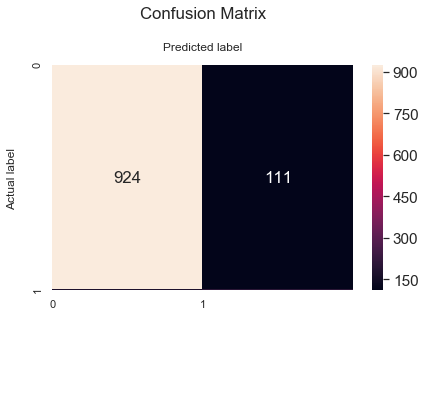

In [72]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=(0, 1), columns = (0, 1))
plt.figure(figsize=(28, 20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot = True, fmt='g')#, cmap="YlGnBu")
# heatmap() : Plot rectangular data as a color-encoded matrix.
# annot : If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.
# fmt : String formatting code to use when adding annotations.
# cmap : The mapping from data values to color space. If not provided, the default will depend on whether center is set.
           
class_names=[0,1]
tick_marks = np.arange(len(class_names))

plt.tight_layout()
plt.title('Confusion Matrix\n', y=1.1)
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")

plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

# cm = confusion_matrix(y_test, y_pred) 
# df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
# plt.figure(figsize = (28,20))


# fig, ax = plt.subplots()
# sn.set(font_scale=1.4)
# sn.heatmap(df_cm, annot=True, fmt='g',#cmap="YlGnBu" 
#            )
# class_names=[0,1]
# tick_marks = np.arange(len(class_names))
# plt.tight_layout()
# plt.title('Confusion matrix\n', y=1.1)
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# ax.xaxis.set_label_position("top")
# plt.ylabel('Actual label\n')
# plt.xlabel('Predicted label\n')

- Evaluate the model using ROC Graph:
    - ROC Graph shows us the capability of a model to distinguish between the classes based on the AUC Mean score.
    - The orange line represents the ROC curve of a random classifier while a good classifier tries to remain as far away from that line as possible.
    - 

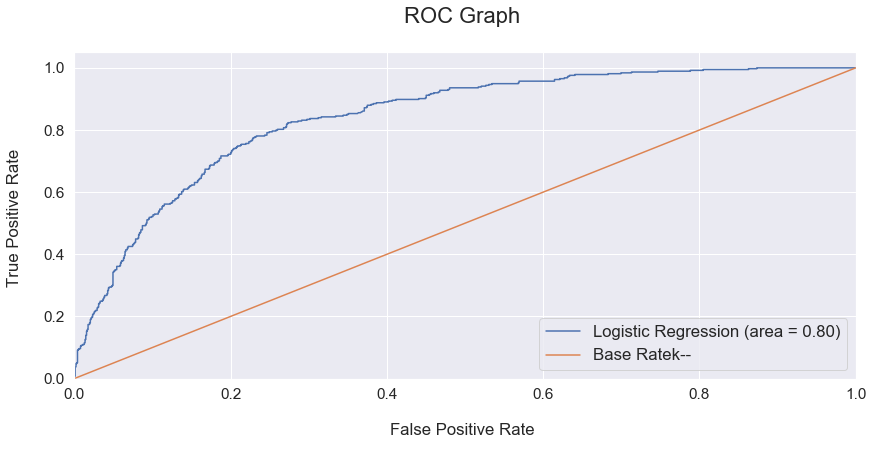

In [73]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
#predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form.

probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()


- Predict feature importance:
    - Logistic Regression allows us to determine the key features that have significance in predicting the target attribute (“Churn” in this project)
    - The logistic regression model predicts that the churn rate would increase positively with month to month contract, optic fibre internet service, electronic checks, absence of payment security and tech support.
    - the model predicts a negative correlation with churn if any customer has subscribed to online security, one-year contract or if they have opted for mailed checks as their payment medium.

In [74]:
#Step 17:Predict Feature Importance------------------------------------------------------
 

# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'customerID').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

# Concat: Concatenate pandas objects along a particular axis with optional set logic along the other axes.

feature_importances.sort_values("coef", ascending = False)

,features,coef
12,InternetService_Fiber optic,0.418207
32,Contract_Month-to-month,0.307577
31,StreamingMovies_Yes,0.169884
6,PaperlessBilling,0.160448
28,StreamingTV_Yes,0.143160
37,PaymentMethod_Electronic check,0.124419
1,SeniorCitizen,0.096950
10,MultipleLines_Yes,0.092731
14,OnlineSecurity_No,0.086426
23,TechSupport_No,0.081998


# Section E: Model Improvement

- Model improvement basically involves choosing the best parameters for the machine learning model that we have come up with. 
- There are two types of parameters in any machine learning model:
    -  the first type are the kind of parameters that the model learns; the optimal values automatically found by running the model.
    -  The second type of parameters is the ones that user get to choose while running the model
    - Such parameters are called the hyperparameters; a set of configurable values external to a model that cannot be determined by the data, and that we are trying to optimize through Parameter Tuning techniques like Random Search or Grid Search
    - Hyperparameter tuning might not improve the model every time. For instance, when we tried to tune the model further, we ended up getting an accuracy score lower than the default one.
    

- Hyper parameter Tuning via Grid Search:

In [75]:
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)

# Exhaustive search over specified parameter values for an estimator
# param_grid : Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries
#    in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 5.94 seconds


(0.7228774155668806, {'C': 0.1, 'penalty': 'l2'})

In [76]:
# Round 2:
# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 0.84 seconds


(0.7221167243241351, {'C': 0.05, 'penalty': 'l2'})

In [77]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

# Section F: Future Predictions:

- Compare predictions agaist the test set :
    

[[924 111]
 [174 200]]
Test Data Accuracy: 0.7977


<Figure size 2016x1440 with 0 Axes>

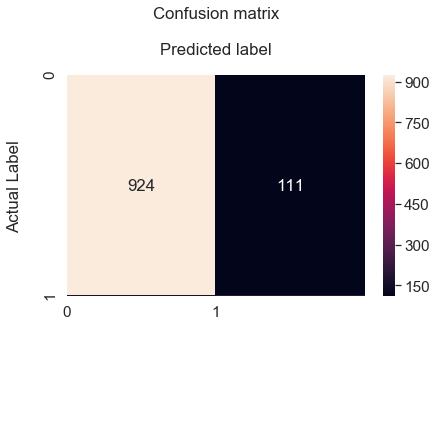

In [82]:
# Revalidate final resultss with confusion Matrix:

cm = confusion_matrix(y_test, y_pred)
print(cm)

#confusion matrix as a quick crosstab:

pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'], colnames=['PRED'])
#crosstab : Compute a simple cross tabulation of two (or more) factors.
# cross tabulation: Cross tabulation is a method to quantitatively analyze the relationship between multiple variables.

# visualize confusion matrix:

cm = confusion_matrix(y_test, y_pred)
df_cm=pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(28,20))

fig, ax=plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#, cmap="#ec838a"
          )

           
class_names=[0,1]
tick_marks=np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual Label\n')
plt.xlabel('Predicted label\n')

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

- Format Final Results:
    - Unpredictability and risk are the close companions of any predictive models.
    - Therefore in the real world, its always a good practice to build a propensity score besides an absolute predicted outcome.
    - Instead of just retrieving a binary estimated target outcome (0 or 1), every ‘Customer ID’ could get an additional layer of propensity score highlighting their percentage of probability to take the target action.

In [84]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"]=y_pred_probs

final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"]*100

final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)

final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]

final_results['Ranking']=pd.qcut(final_results["propensity_to_churn(%)"].rank(method='first'),10,labels=range(10,0,-1))

print(final_results)



      customerID  Churn  predictions  propensity_to_churn(%) Ranking
6403  3258-ZKPAI      0            0                    3.16       9
5099  6861-OKBCE      1            0                   11.90       7
6931  2371-KFUOG      0            0                    8.70       7
5891  4905-JEFDW      1            0                   36.47       4
6152  7562-GSUHK      1            1                   51.46       3
...          ...    ...          ...                     ...     ...
4590  4884-TVUQF      0            0                    5.19       8
4974  4430-UZIPO      1            0                   36.79       3
663   9565-FLVCG      0            0                    1.61       9
6676  5274-XHAKY      0            0                   27.84       4
497   0505-SPOOW      0            0                    0.57      10

[1409 rows x 5 columns]


# Section G: Model Deployment

- Lastly, deploy the model to a server using ‘joblib’ library so that we can productionize the end-to-end machine learning framework.
- Later we can run the model over any new dataset to predict the probability of any customer to churn in months to come.

- Save the model:
    

In [85]:
filename = 'final_model.model'
i = [lr_classifier]
joblib.dump(i,filename)

['final_model.model']

- So, in a nutshell, we made use of a customer churn dataset from Kaggle to build a machine learning classifier that predicts the propensity of any customer to churn in months to come with a reasonable accuracy score of 76% to 84%.